<p align="center">
    <img src="https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/076ffad6-abf4-431b-af15-10373ba06182" align="right">
</p>

# ***용해탱크 시계열 데이터 AI 실습***

**제목:** 용해탱크의 품질 예측을 위한 AI 실습  <br>
**Description:** 용해탱크로부터 수집한 데이터를 전처리하고, 딥러닝 모델을 사용하여 품질 예측을 수행합니다

본 자료는 정부에서 운영하는 아래의 KAMP(한국인공지능제조플랫폼)의 데이터 및 예제를 수정한 교육자료입니다.

중소벤처기업부, Korea AI Manufacturing Platform(KAMP), 용해탱크 AI 데이터셋, KAIST(㈜ 임픽스, 한양대학교 산학협력단, ㈜아큐라소프트), 2020.12.14., www.kamp-ai.kr

https://www.kamp-ai.kr/aidataDetail?AI_SEARCH=%EC%9A%A9%ED%95%B4%ED%83%B1%ED%81%AC&page=1&DATASET_SEQ=8&EQUIP_SEL=&GUBUN_SEL=&FILE_TYPE_SEL=&WDATE_SEL=

※ 분석하기에 앞서 다음과 같은 가상환경이 구축되어있는지 확인해주세요. <br>
Python 버전 : 3.10.12

In [1]:
!python --version

Python 3.10.12


## 1. 분석 개요

### 1.1 분석 배경

**공정(설비) 개요:**
- 용해공정은 분말 원재료를 액상 원재료에 녹이는 공정으로, 식품, 화학, 석유화학 등 다양한 분야에서 적용됩니다.
- 용해공정의 품질은 후공정 및 완제품의 품질에 큰 영향을 미치며, 균일한 혼합물이 되도록 하는 것이 중요합니다.

![melting_1.png](https://www.kamp-ai.kr/mnt/dataset/8/images/1.png)<br>
<center>[용해공정 설비(사진)]</center> <br>

**이슈사항(Pain Point):**
- 공정에서 설정한 기준값에 따라 운영하더라도 다양한 변수로 인해 품질이 변동됩니다.
- 작업자의 경험과 노하우에 의존하여 대처하는 경우가 많으며, 이로 인해 일관된 품질 관리가 어려운 경우가 있습니다.

### 1.2 분석 목표

**분석 목표:**
- 용해탱크의 운영 데이터를 통해 최종 제품의 품질을 예측합니다.
- 머신러닝 모델을 사용하여 공정 중 발생할 수 있는 불량을 예측하고, 이를 통해 품질을 개선하고자 합니다.

**제조 데이터 분석 기대효과:**
- 데이터 분석을 통해 설비 운영 조건에 따른 생산 품질을 예측하고, 불량률을 낮추기 위한 최적의 운영 조건을 도출합니다.

### 1.3 제조데이터 소개

**데이터 수집 방법:**
 - 제조 분야 : 분무건조공법을 이용한 분말유크림 제조 
 - 제조 공정명 : 용해혼합
 - 수집장비 : PLC(설비데이터) 및 DBMS(품질데이터) 
 - 수집기간 : 2020년 3월 4일 ~ 2020년 4월 30일 (약 2개월) 
 - 수집주기 : 사이클타임 약 6초

**데이터 유형/구조:**<br>
![melting_2.png](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/44ee0db6-aed1-4593-b4a3-40788741af18)<br>

 - 데이터 크기, 데이터 수량: 7개 컬럼, 836,200개의 관측치
 - 데이터 속성 정의 표:<br>
![melting_3.png](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/2c4d4837-9854-4d80-bc71-f6a7b34d0822)<br>
 - 독립변수/종속변수 정의:<br>
 ![melting_4.png](https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/cfe8ce2f-6ecd-43f4-8bea-bc96ed0810c4)<br>
 

## 2. 분석 실습


### 2-1. 라이브러리 / 데이터 불러오기

#### 필요한 라이브러리 설치 및 불러오기

In [2]:
!pip install --upgrade pip

In [3]:
!pip install tensorflow==2.16.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.0 scikit-learn==1.5.0 imbalanced-learn==0.9.0

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow

#### 데이터 불러오기

In [5]:
data_path = './dataset/melting_tank.csv'  # 실제 데이터 경로로 변경하세요
data = pd.read_csv(data_path)

### 2-2. 데이터 특성 파악


#### 데이터 기본 구조 파악

In [6]:
print(data.head())

            STD_DT  NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0  2020-03-04 0:00    0        489         116          631  3.19  OK
1  2020-03-04 0:00    1        433          78          609  3.19  OK
2  2020-03-04 0:00    2        464         154          608  3.19  OK
3  2020-03-04 0:00    3        379         212          606  3.19  OK
4  2020-03-04 0:00    4        798        1736          604  3.21  OK


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB
None


In [8]:
print(data.describe())

                 NUM      MELT_TEMP     MOTORSPEED    MELT_WEIGHT  \
count  835200.000000  835200.000000  835200.000000  835200.000000   
mean   417599.500000     509.200623     459.782865     582.962125   
std    241101.616751     128.277519     639.436413    1217.604433   
min         0.000000     308.000000       0.000000       0.000000   
25%    208799.750000     430.000000     119.000000     186.000000   
50%    417599.500000     469.000000     168.000000     383.000000   
75%    626399.250000     502.000000     218.000000     583.000000   
max    835199.000000     832.000000    1804.000000   55252.000000   

                INSP  
count  835200.000000  
mean        3.194853  
std         0.011822  
min         3.170000  
25%         3.190000  
50%         3.190000  
75%         3.200000  
max         3.230000  


#### 시간 정보 datetime 형태 변환 및 인덱스 지정

In [9]:
data['STD_DT'] = pd.to_datetime(data['STD_DT'])

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB
None


In [11]:
data = data.set_index(['STD_DT'])

In [12]:
print(data.head())

            NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
STD_DT                                                       
2020-03-04    0        489         116          631  3.19  OK
2020-03-04    1        433          78          609  3.19  OK
2020-03-04    2        464         154          608  3.19  OK
2020-03-04    3        379         212          606  3.19  OK
2020-03-04    4        798        1736          604  3.21  OK


#### Histogram 및 Plot 그리기

##### Histogram

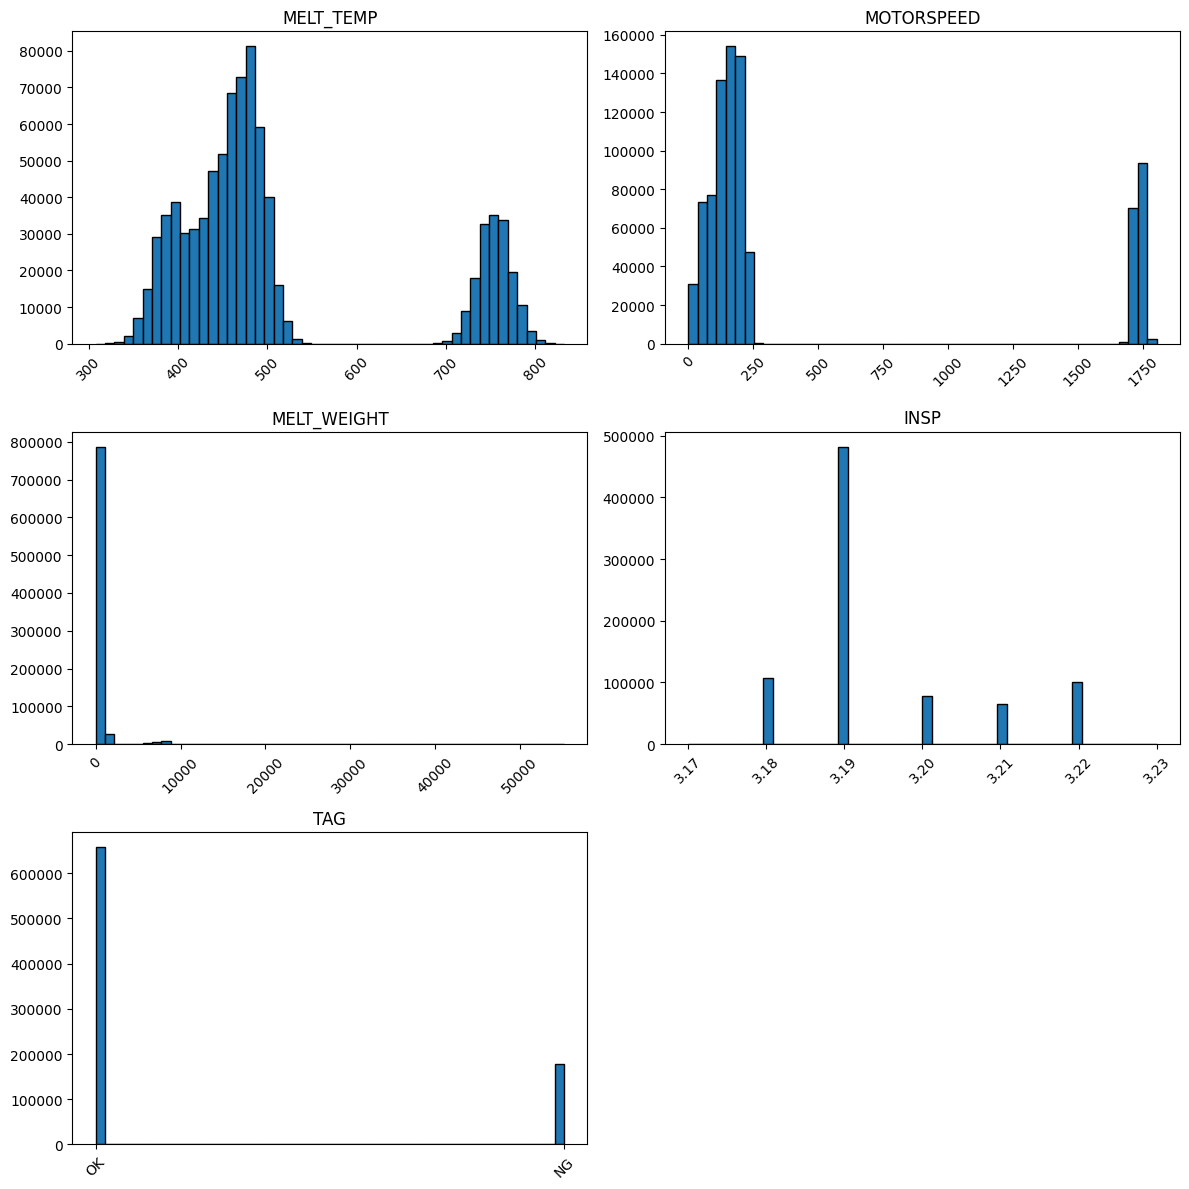

In [13]:
col_names = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

# 반복문을 시작하기에 앞서 각 그래프의 사이즈를 12x12로 지정
plt.figure(figsize=(12, 12))

# 각 변수에 대해 히스토그램을 그리기 위한 반복문
for i in range(len(col_names)):
    plt.subplot(3, 2, i + 1)
    plt.hist(data[col_names[i]], bins=50, edgecolor='k')
    plt.xticks(rotation=45)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

##### Plot

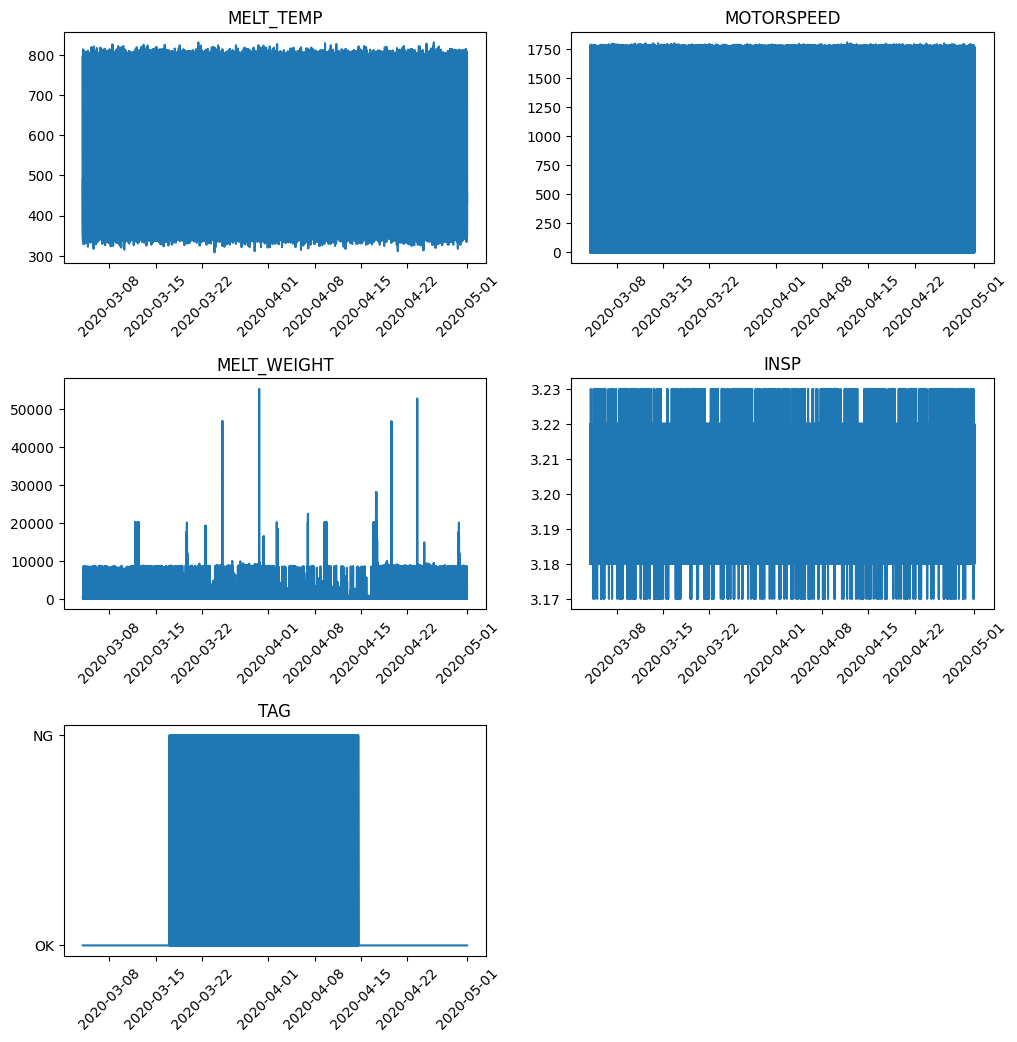

In [14]:
# 반복문을 시작하기에 앞서 각 그래프의 사이즈를 12x12로 지정
plt.figure(figsize=(12, 12))

# 각 변수에 대해 plot을 그리기 위한 반복문
for i in range(len(col_names)):
    plt.subplot(3, 2, i + 1)
    plt.plot(data[col_names[i]])
    plt.xticks(rotation=45)
    plt.title(col_names[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

##### Plot(0:100 Slicing)

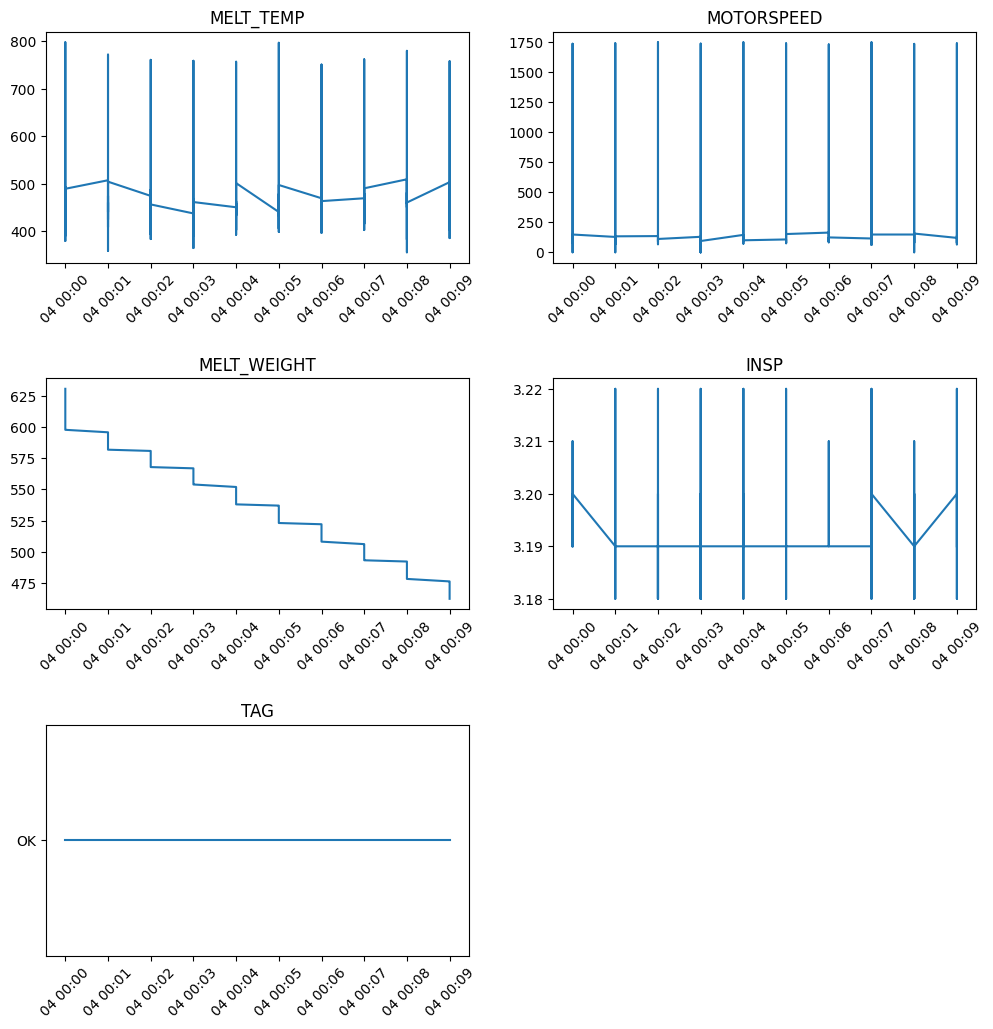

In [15]:
# 반복문을 시작하기에 앞서 각 그래프의 사이즈를 12x12로 지정
plt.figure(figsize=(12, 12))

# 각 변수에 대해 plot을 그리기 위한 반복문
for i in range(len(col_names)):
    plt.subplot(3, 2, i + 1)
    plt.plot(data[col_names[i]][0:100])
    plt.xticks(rotation=45)
    plt.title(col_names[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

#### 범주형 변수 인코딩

In [16]:
label_encoder = LabelEncoder()
data['TAG'] = label_encoder.fit_transform(data['TAG'])

In [17]:
data['TAG'].value_counts()

TAG
1    658133
0    177067
Name: count, dtype: int64

#### 상관관계 확인

In [18]:
print(data.corr(method='pearson'))

                  NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT      INSP       TAG
NUM          1.000000   0.000188   -0.000050     0.080079 -0.000524  0.086698
MELT_TEMP    0.000188   1.000000    0.944929    -0.000336  0.916295  0.310586
MOTORSPEED  -0.000050   0.944929    1.000000     0.000123  0.887813  0.264693
MELT_WEIGHT  0.080079  -0.000336    0.000123     1.000000 -0.000005 -0.012084
INSP        -0.000524   0.916295    0.887813    -0.000005  1.000000  0.272580
TAG          0.086698   0.310586    0.264693    -0.012084  0.272580  1.000000


### 2-3. 데이터 정제(전처리)


#### 분석에 활용할 칼럼 추출

In [19]:
data = data[['MELT_TEMP', 'MOTORSPEED', 'INSP', 'TAG']]

#### 훈련/테스트 데이터 분리

In [20]:
split_date = int(data.shape[0]*0.7)
train = data[:split_date]
test = data[split_date:]

In [21]:
train

,MELT_TEMP,MOTORSPEED,INSP,TAG
STD_DT,,,,
2020-03-04 00:00:00,489,116,3.19,1
2020-03-04 00:00:00,433,78,3.19,1
2020-03-04 00:00:00,464,154,3.19,1
2020-03-04 00:00:00,379,212,3.19,1
2020-03-04 00:00:00,798,1736,3.21,1
...,...,...,...,...
2020-04-13 14:23:00,748,1737,3.22,1
2020-04-13 14:23:00,381,216,3.19,1
2020-04-13 14:23:00,474,148,3.19,1


In [22]:
train.shape

(584640, 4)

In [23]:
test.shape

(250560, 4)

#### 정규화

Min-max normalization는 데이터를 0과 1 사이의 값으로 scaling합니다.

1) data의 최대값(max)과 최소값(min)을 구한다.
2) 정규화할 데이터 값(x)과 앞서 구한 최대값(Xmax), 최소값(Xmin)을 다음의 식에 대입한다.<br>

<img src="https://github.com/YoungsukHan/Hyundai_equip/assets/44924554/c5a29097-0eb4-44a5-b379-2ea9df771095" width="400" height="400"/>

In [24]:
# 데이터 정규화
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [25]:
train_scaled

array([[0.34541985, 0.06430155, 0.33333333, 1.        ],
       [0.23854962, 0.04323725, 0.33333333, 1.        ],
       [0.29770992, 0.08536585, 0.33333333, 1.        ],
       ...,
       [0.31679389, 0.08203991, 0.33333333, 1.        ],
       [0.1870229 , 0.03769401, 0.16666667, 1.        ],
       [0.32251908, 0.05820399, 0.33333333, 1.        ]])

#### 독립변수(feature)와 종속변수(label) 분리

In [26]:
X_train_values = train_scaled[:, :-1]
y_train_values = train_scaled[:, -1]
X_test_values = test_scaled[:, :-1]
y_test_values = test_scaled[:, -1]

#### Window 정의 함수 생성

Window는 딥러닝을 학습하기 위한 단위로, window size는 timestep과 같다고 생각하면 된다. <br>
입력한 timestep만큼의 데이터를 저장하여 과거 값(예를들어, 1~10)을 통해 현재 종속변수를 예측하는 것이다.

In [27]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

In [28]:
TIME_STEPS = 10

X_train, y_train = create_dataset(X_train_values, y_train_values, TIME_STEPS)
X_test, y_test = create_dataset(X_test_values, y_test_values, TIME_STEPS)

In [29]:
X_test.shape

(250550, 10, 3)

In [30]:
y_test.shape

(250550,)

### 2-4. 모델 구축 및 훈련


**CNN**
- 합성곱 신경망(Convolutional Neural Network, CNN)은 이미지 처리에 주로 사용되는 딥러닝 모델로, 이미지의 패턴과 특징을 자동으로 추출하여 분류 및 인식을 수행합니다.
- CNN은 이미지 분류, 객체 인식, 얼굴 인식 등 다양한 컴퓨터 비전 작업에서 뛰어난 성능을 보입니다.<br>
- CNN의 주요 구성 요소
  1. 합성곱 층 (Convolutional Layer): 입력 이미지에 여러 개의 필터를 적용하여 특징 맵을 생성합니다.
  2. 풀링 층 (Pooling Layer): 특징 맵의 크기를 줄여 계산량을 감소시키고, 중요한 특징을 추출합니다.
  3. 완전 연결 층 (Fully Connected Layer): 추출된 특징을 기반으로 최종 출력을 생성합니다.<br>

    |<b>CNN의 기본 구조</b> |
    | :--: |
    | ![](https://media.licdn.com/dms/image/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/0/1680532048475?e=1722470400&v=beta&t=0wvlOsASQ4GVANk_DcYNZC4XEeHV4X9hf0JhtCpEiNQ)|
    |출처: https://www.linkedin.com/pulse/what-convolutional-neural-network-cnn-deep-learning-nafiz-shahriar/|

**1-D CNN**
- 1-D CNN (1차원 합성곱 신경망)은 시계열 데이터, 신호 처리, 텍스트 데이터 등 1차원 데이터를 처리하는 데 적합한 모델입니다.
- 2차원 이미지를 처리하는 일반적인 CNN과 달리, 1-D CNN은 1차원 데이터의 패턴을 학습하고 특징을 추출합니다.
 
    |<b>1-D CNN의 기본 구조</b> |
    | :--: |
    | ![](https://miro.medium.com/v2/resize:fit:1400/1*iJyzEak-RGfpcBC9v-8oAg.png)|
    |출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fhow-to-use-convolutional-neural-networks-for-time-series-classification-56b1b0a07a57&psig=AOvVaw1HHYhpGxsMj5Gws5uQbKr9&ust=1717153551480000&source=images&cd=vfe&opi=89978449&ved=0CBQQjhxqFwoTCPDSvq2etYYDFQAAAAAdAAAAABAE|

### 1-D CNN 모델 구축


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout

# 1D-CNN 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(GlobalMaxPooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 모델 학습

In [32]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7127 - loss: 0.5390 - val_accuracy: 0.6117 - val_loss: 0.5692
Epoch 2/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7247 - loss: 0.5100 - val_accuracy: 0.5843 - val_loss: 0.5696
Epoch 3/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7255 - loss: 0.5059 - val_accuracy: 0.5865 - val_loss: 0.5526
Epoch 4/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7275 - loss: 0.5037 - val_accuracy: 0.5853 - val_loss: 0.5614
Epoch 5/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7291 - loss: 0.5028 - val_accuracy: 0.5852 - val_loss: 0.5502
Epoch 6/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7272 - loss: 0.5027 - val_accuracy: 0.5851 - val_loss: 0.5544
Epoch 7/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7286 - loss: 0.5025 - val_accuracy: 0.6013 - val_loss: 0.5490
Epoch 8/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7289 - loss: 0

#### 손실 그래프 시각화

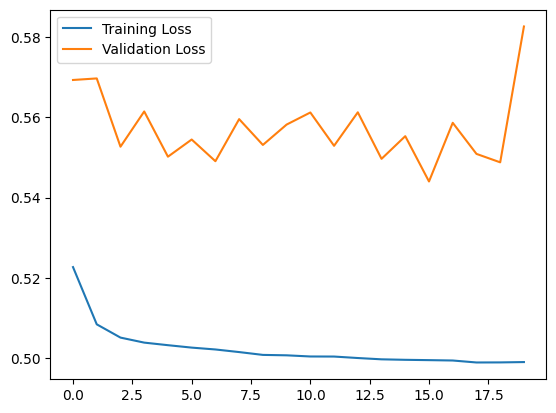

In [33]:
# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 2-5. 모델 평가


7830/7830 ━━━━━━━━━━━━━━━━━━━━ 5s 604us/step
              precision    recall  f1-score   support

         0.0       0.00      0.03      0.00      2940
         1.0       0.99      0.81      0.89    247610

    accuracy                           0.80    250550
   macro avg       0.49      0.42      0.45    250550
weighted avg       0.97      0.80      0.88    250550

[[    85   2855]
 [ 47829 199781]]


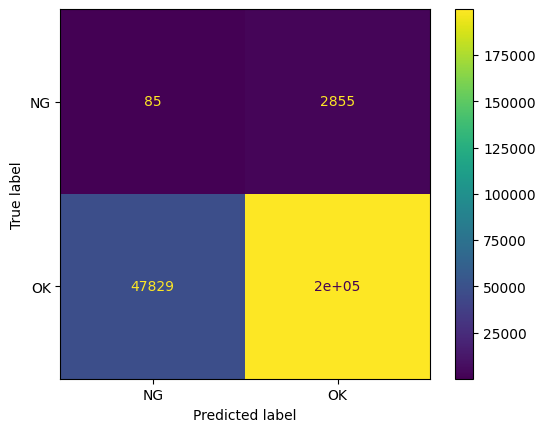

In [34]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In [35]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7977
F1 Score: 0.8874


### 2-6. 모델 개선(1) - 모델 고도화, 전처리 수정

#### 추가 레이어 사용


**BatchNormalization**
- BatchNormalization은 신경망의 각 층에서 미니 배치의 평균과 표준편차를 이용하여 입력을 정규화하는 방법입니다.
- 이는 학습 과정의 안정성과 속도를 높이고, 초기화에 덜 민감하게 합니다.
  
    |<b>BatchNormalization</b> |
    | :--: |
    | ![](https://gaussian37.github.io/assets/img/dl/concept/batchnorm/4.png)|
    |출처: https://gaussian37.github.io/dl-concept-batchnorm/|

**Dropout**
- Dropout은 학습 중에 무작위로 뉴런을 비활성화(즉, "드롭")하여 과적합을 방지하는 정규화 기법입니다.|
- 학습 시 각 뉴런을 일정 확률로 비활성화하고, 예측 시에는 모든 뉴런을 사용합니다.
  
    |<b>Dropout</b> |
    | :--: |
    | ![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/2-1-2048x745-1.jpg)|
    |출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.baeldung.com%2Fcs%2Fml-relu-dropout-layers&psig=AOvVaw2j4B2PJph8_6dstiZWSjWe&ust=1717154169027000&source=images&cd=vfe&opi=89978449&ved=0CBQQjhxqFwoTCKD4pI6gtYYDFQAAAAAdAAAAABAE|

Epoch 1/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7086 - loss: 0.5292 - val_accuracy: 0.5998 - val_loss: 0.5178
Epoch 2/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7230 - loss: 0.4998 - val_accuracy: 0.6225 - val_loss: 0.5098
Epoch 3/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7243 - loss: 0.4943 - val_accuracy: 0.6242 - val_loss: 0.4857
Epoch 4/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7234 - loss: 0.4938 - val_accuracy: 0.6853 - val_loss: 0.4826
Epoch 5/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7225 - loss: 0.4932 - val_accuracy: 0.7462 - val_loss: 0.5327
Epoch 6/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7240 - loss: 0.4911 - val_accuracy: 0.6889 - val_loss: 0.4724
Epoch 7/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7240 - loss: 0.4907 - val_accuracy: 0.6339 - val_loss: 0.4689
Epoch 8/20
9355/9355 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7254 - loss: 0

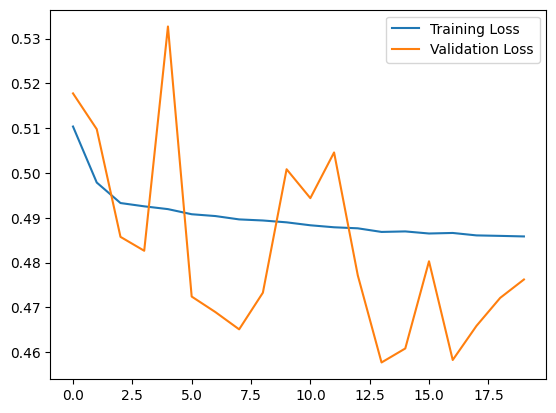

7830/7830 ━━━━━━━━━━━━━━━━━━━━ 7s 900us/step
              precision    recall  f1-score   support

         0.0       0.01      0.23      0.02      2940
         1.0       0.99      0.75      0.86    247610

    accuracy                           0.75    250550
   macro avg       0.50      0.49      0.44    250550
weighted avg       0.98      0.75      0.85    250550

[[   677   2263]
 [ 60997 186613]]


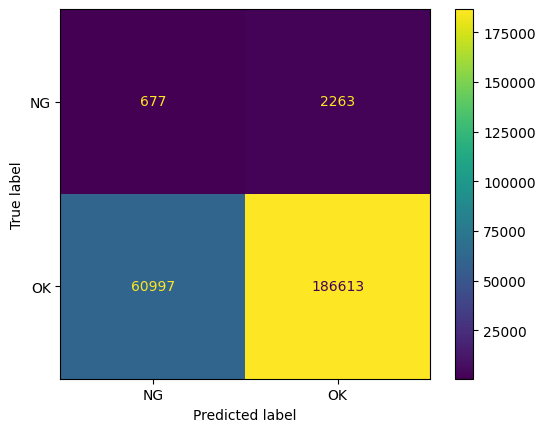

In [44]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# 1D-CNN 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 모델 평가
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In [45]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7475
F1 Score: 0.8551


#### 클래스 불균형 문제 해결(SMOTE)

In [46]:
X_train_values

array([[0.34541985, 0.06430155, 0.33333333],
       [0.23854962, 0.04323725, 0.33333333],
       [0.29770992, 0.08536585, 0.33333333],
       ...,
       [0.31679389, 0.08203991, 0.33333333],
       [0.1870229 , 0.03769401, 0.16666667],
       [0.32251908, 0.05820399, 0.33333333]])

In [47]:
y_train_values

array([1., 1., 1., ..., 1., 1., 1.])

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_values, y_train_values)

In [49]:
pd.Series(y_train_values).value_counts()

1.0    410516
0.0    174124
Name: count, dtype: int64

In [50]:
pd.Series(y_res).value_counts()

1.0    410516
0.0    410516
Name: count, dtype: int64

Epoch 1/20


C:\Users\Han\Miniconda3\envs\hyundai_equip_6\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13137/13137 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7282 - loss: 0.4957 - val_accuracy: 1.0000 - val_loss: 2.8018e-05
Epoch 2/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7331 - loss: 0.4635 - val_accuracy: 1.0000 - val_loss: 6.6153e-07
Epoch 3/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7355 - loss: 0.4575 - val_accuracy: 1.0000 - val_loss: 4.0065e-06
Epoch 4/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7392 - loss: 0.4524 - val_accuracy: 1.0000 - val_loss: 1.8237e-06
Epoch 5/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7414 - loss: 0.4502 - val_accuracy: 1.0000 - val_loss: 1.0468e-05
Epoch 6/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7412 - loss: 0.4505 - val_accuracy: 1.0000 - val_loss: 1.5010e-06
Epoch 7/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7415 - loss: 0.4492 - val_accuracy: 1.0000 - val_loss: 7.4467e-07
Epoch 8/20
13137/13137 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/

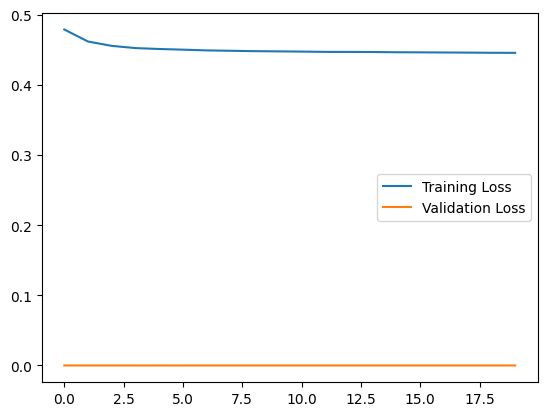

7830/7830 ━━━━━━━━━━━━━━━━━━━━ 5s 649us/step
              precision    recall  f1-score   support

         0.0       0.04      0.18      0.06      2940
         1.0       0.99      0.95      0.97    247610

    accuracy                           0.94    250550
   macro avg       0.51      0.56      0.52    250550
weighted avg       0.98      0.94      0.96    250550

[[   521   2419]
 [ 12599 235011]]


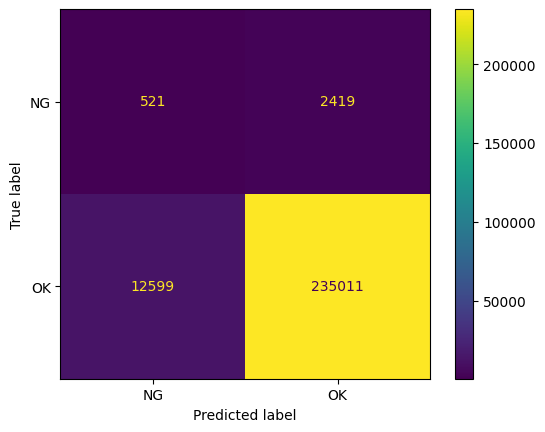

In [53]:
# 데이터셋 생성
X_train, y_train = create_dataset(X_res, y_res, TIME_STEPS)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(GlobalMaxPooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 모델 평가
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_class), display_labels=label_encoder.classes_)
disp.plot()
plt.show()

In [54]:
# F1 Score 및 Accuracy 계산
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9401
F1 Score: 0.9690


### 2-7. 모델 개선(2) - 하이퍼파라미터 튜닝

In [ ]:
# 모델 재정의 및 학습
model = Sequential()

# Conv1D를 반복해서 추가
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(TIME_STEPS, X_train.shape[2])))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense 레이어 추가
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

# 손실 그래프 시각화
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 모델 평가
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))